# Test a Perceptual Phenomenon -- Stroop Effect 


## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Question For Investigation

### 1. What is our independent variable? What is our dependent variable?

Independent variable: Congruent/Incongruent words condition -- whether or not the word matches the ink color.

Dependent variable: The time it takes to name the ink colors in equally-sized lists.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Hypotheses: There is difference between the time it takes to name the ink colors in equally-sized lists for congruent words and incongruent words. 

In order to test the hypotheses, we can compare the average time it takes to name the congruent words and the average time it takes to name the incongruent words, i.e. the population means of the two conditions. However, it is impossible for us to collect the population's data. We then select a sample and use the statistics (mean, median, std, variance, etc.) of the sameple to make inferences of the population. 

We can use two tailed paired student T-test to investigate. The same subject is involved in both the congruent words condition test and the incongruent words condition test. 

Specifically, the two tailed hypotheses is:

H0: mu = 0 (there is no difference between the population means under the two conditions)

H1: mu != 0 (there is difference between the population means under the two conditions)

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [1]:
import unicodecsv
import numpy as np

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

data = read_csv('stroopdata.csv')

In [2]:
len(data)

24

In [3]:
congruent_data = list()
incongruent_data = list()

for subject in data:
    congruent_data.append(float(subject['Congruent']))
    incongruent_data.append(float(subject['Incongruent']))

congruent_array = np.array(congruent_data)
incongruent_array = np.array(incongruent_data)

print 'Congruent: mean {}, median {}, std {}, variance {}'.format(np.mean(congruent_array), \
                                                                  np.median(congruent_array), \
                                                                  np.std(congruent_array, ddof=1), \
                                                                  np.var(congruent_array, ddof=1))
print 'Incongruent: mean {}, median {}, std {}, variance {}'.format(np.mean(incongruent_array), \
                                                                  np.median(incongruent_array), \
                                                                  np.std(incongruent_array, ddof=1), \
                                                                  np.var(incongruent_array, ddof=1))

Congruent: mean 14.051125, median 14.3565, std 3.55935795765, variance 12.6690290707
Incongruent: mean 22.0159166667, median 21.0175, std 4.79705712247, variance 23.0117570362


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


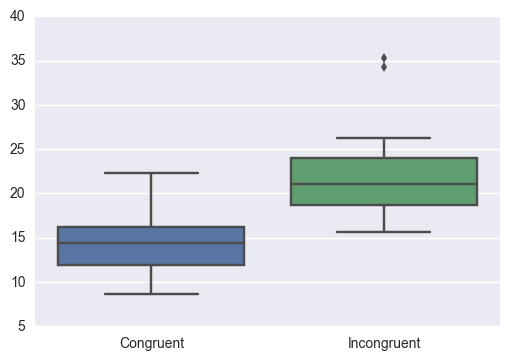

In [5]:
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_to_plot = pd.DataFrame({
        'Congruent': congruent_array,
        'Incongruent': incongruent_array
    }
)
sns.boxplot(data_to_plot)

The cell above shows the boxplot graph of the stroop effect test. As we can see, the two groups have significant difference in median time, and incongruent group has much longer time than congruent group.

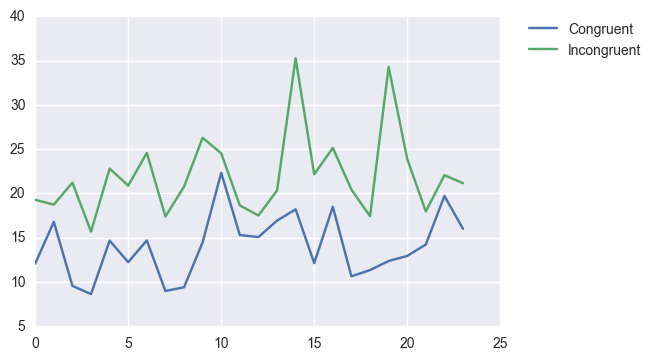

In [6]:
plt.plot(congruent_array, label='Congruent')
plt.plot(incongruent_array, label='Incongruent')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The cell above shows two lines indicating the time it takes to name the words. Intuitively, the incongruent group has longer time than congruent group.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

The Hypothesis:
H0: mu = 0 (there is no difference between the sample means under the two conditions)
H1: mu != 0 (there is difference between the sample means under the two conditions)

confidence level: 95%
alpha = 1- (confidence level) = 0.05


In [7]:
from scipy import stats

stats.ttest_rel(congruent_array, incongruent_array)

Ttest_relResult(statistic=-8.0207069441099588, pvalue=4.1030005857111556e-08)

According to the results above,

T-statistic: -8.0207069441099588
p value: 4.1030005857111556e-08

Since p is less than alpha, we reject the null hyporhesis. Therefore, the conclusion is there is difference between the time it takes to name congruent and incongruent words.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think the stoop effect is because of the distraction from the words which are different from the ink colors. Since our brain has already built connections between those words and colors, it is easier for us to recognize and pronouce the words. However, when the words and colors are different, the connections we have built before have to be broken and our brain needs more time to recognize them.

According to Wikipedia [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect), an alternative task is emotional stoop effect. The negative words and neutral words are used with ink colors in the test. 